In [1]:
from glob import glob
import pandas as pd

In [2]:
df_total=pd.DataFrame()
df_추정매출=pd.DataFrame()
df_상주인구=pd.DataFrame()
df_생활인구=pd.DataFrame()
df_소득소비=pd.DataFrame()
df_아파트=pd.DataFrame()
df_영역=pd.DataFrame()
df_점포=pd.DataFrame()
df_직장인구=pd.DataFrame()
df_집객시설=pd.DataFrame()

In [3]:
path='../../data/raw data/행정동/'

#### 추정매출

In [4]:
## 2023년 추출 코드 필요하면 쓰세요
data = pd.read_csv("../../data/raw data/행정동/추정매출/서울시 상권분석서비스(추정매출-행정동).csv", encoding="cp949")
data_dropped = data[data['기준_년분기_코드'] >= 20231]
data_dropped.to_csv('../../data/raw data/행정동/추정매출/서울시_상권분석서비스(추정매출-행정동)_2023년.csv', index=False, encoding="cp949")

In [5]:
dfs_추정매출=[]
for f_name in glob(path+'추정매출/서울시_상권분석서비스(추정매출-행정동)_*.csv'):
    print(f_name)
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_추정매출.append(temp)
a,b,c,d,e =dfs_추정매출

../../data/raw data/행정동/추정매출\서울시_상권분석서비스(추정매출-행정동)_2019년.csv
../../data/raw data/행정동/추정매출\서울시_상권분석서비스(추정매출-행정동)_2020년.csv
../../data/raw data/행정동/추정매출\서울시_상권분석서비스(추정매출-행정동)_2021년.csv
../../data/raw data/행정동/추정매출\서울시_상권분석서비스(추정매출-행정동)_2022년.csv
../../data/raw data/행정동/추정매출\서울시_상권분석서비스(추정매출-행정동)_2023년.csv


In [6]:
df_추정매출=pd.concat([a,b,c,d,e])
df_추정매출 = df_추정매출.reset_index(drop=True)
df_추정매출.shape

(317954, 53)

In [7]:
df_추정매출['기준_년분기_코드'].unique()

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232,
       20233], dtype=int64)

In [8]:
df_추정매출.isna().sum().sum()

0

#### 상주인구

In [9]:
dfs_상주인구=[]
for f_name in glob(path+'상주인구/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_상주인구.append(temp)
df_상주인구,=dfs_상주인구
df_상주인구.shape

(8054, 27)

In [10]:
df_상주인구.isna().sum()

기준_년분기_코드             0
행정동_코드                0
행정동_코드_명              0
총_상주인구_수              0
남성_상주인구_수             0
여성_상주인구_수             0
연령대_10_상주인구_수         0
연령대_20_상주인구_수         0
연령대_30_상주인구_수         0
연령대_40_상주인구_수         0
연령대_50_상주인구_수         0
연령대_60_이상_상주인구_수      0
남성연령대_10_상주인구_수       0
남성연령대_20_상주인구_수       0
남성연령대_30_상주인구_수       0
남성연령대_40_상주인구_수       0
남성연령대_50_상주인구_수       0
남성연령대_60_이상_상주인구_수    0
여성연령대_10_상주인구_수       0
여성연령대_20_상주인구_수       0
여성연령대_30_상주인구_수       0
여성연령대_40_상주인구_수       0
여성연령대_50_상주인구_수       0
여성연령대_60_이상_상주인구_수    0
총_가구_수                0
아파트_가구_수              0
비_아파트_가구_수            0
dtype: int64

In [11]:
df_상주인구['기준_년분기_코드'].unique()

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20224, 20231, 20232, 20233,
       20223], dtype=int64)

In [12]:
temp_total=0
cnt=0
for x in df_상주인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_상주인구.loc[df_상주인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:418  
년분기: 20192  행정동 개수:418  년분기: 20193  행정동 개수:418  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20224  행정동 개수:425  년분기: 20231  행정동 개수:425  
년분기: 20232  행정동 개수:425  년분기: 20233  행정동 개수:425  년분기: 20223  행정동 개수:425  
cnt: 19


In [13]:
# 20191, 20192, 20193 
dong_code_20191=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20191]['행정동_코드'])
dong_code_20192=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20192]['행정동_코드'])
dong_code_20193=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20193]['행정동_코드'])
dong_code_20194=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20194]['행정동_코드'])

In [14]:
total_dong_code_425=dong_code_20194.copy()
diff_191=[x for x in total_dong_code_425 if x not in dong_code_20191 ]
diff_192=[x for x in total_dong_code_425 if x not in dong_code_20192 ]
diff_193=[x for x in total_dong_code_425 if x not in dong_code_20193 ]
print("빠진 행정동 코드")
print(diff_191)
print(diff_192)
print(diff_193)
# 번1,2,3동/ 수유1,2,3동/ 항동

빠진 행정동 코드
[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]


In [15]:
없는_행정동코드=[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
# 19년 1,2,3분기 7개 동 데이터 없음 -> 19년 4분기 7개 동 데이터로 추가
for x in 없는_행정동코드: # 7개 동 리스트
    new_row1=df_상주인구.loc[(df_상주인구['행정동_코드']==x)&(df_상주인구['기준_년분기_코드']==20194)]
    new_row1['기준_년분기_코드']=20191
    new_row2=df_상주인구.loc[(df_상주인구['행정동_코드']==x)&(df_상주인구['기준_년분기_코드']==20194)]
    new_row2['기준_년분기_코드']=20192
    new_row3=df_상주인구.loc[(df_상주인구['행정동_코드']==x)&(df_상주인구['기준_년분기_코드']==20194)]
    new_row3['기준_년분기_코드']=20193
    df_상주인구 = pd.concat([df_상주인구, new_row1, new_row2, new_row3], ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23392\2411538292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_row1['기준_년분기_코드']=20191
C:\Users\user\AppData\Local\Temp\ipykernel_23392\2411538292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_row2['기준_년분기_코드']=20192
C:\Users\user\AppData\Local\Temp\ipykernel_23392\2411538292.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [16]:
cnt=0
for x in df_상주인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_상주인구.loc[df_상주인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20224  행정동 개수:425  년분기: 20231  행정동 개수:425  
년분기: 20232  행정동 개수:425  년분기: 20233  행정동 개수:425  년분기: 20223  행정동 개수:425  
cnt: 19


In [17]:
df_상주인구.shape

(8075, 27)

### 생활인구

In [18]:
dfs_생활인구=[]
for f_name in glob(path+'생활인구/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_생활인구.append(temp)
df_생활인구,=dfs_생활인구
df_생활인구.shape

(8075, 25)

In [19]:
cnt=0
for x in df_생활인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_생활인구.loc[df_생활인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20223  행정동 개수:425  년분기: 20224  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20232  행정동 개수:425  년분기: 20233  행정동 개수:425  
cnt: 19


In [20]:
df_생활인구.isna().sum()

기준_년분기_코드           0
행정동_코드              0
행정동_코드_명            0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64

In [21]:
df_생활인구.shape

(8075, 25)

### 소득소비

In [22]:
dfs_소득소비=[]
for f_name in glob(path+'소득소비/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_소득소비.append(temp)
df_소득소비,=dfs_소득소비
df_소득소비.shape

(8075, 16)

In [23]:
cnt=0
for x in df_소득소비['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_소득소비.loc[df_소득소비['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20231  행정동 개수:425  
년분기: 20232  행정동 개수:425  년분기: 20233  행정동 개수:425  년분기: 20191  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  
년분기: 20194  행정동 개수:425  년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  
년분기: 20203  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20223  행정동 개수:425  년분기: 20224  행정동 개수:425  
cnt: 19


In [24]:
df_소득소비.isna().sum()

기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
월_평균_소득_금액      0
소득_구간_코드        0
지출_총금액          0
식료품_지출_총금액      0
의류_신발_지출_총금액    0
생활용품_지출_총금액     0
의료비_지출_총금액      0
교통_지출_총금액       0
교육_지출_총금액       0
유흥_지출_총금액       0
여가_문화_지출_총금액    0
기타_지출_총금액       0
음식_지출_총금액       0
dtype: int64

In [25]:
df_소득소비.shape

(8075, 16)

### 아파트

In [26]:
# 아파트
dfs_아파트=[]
for f_name in glob(path+'아파트/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_아파트.append(temp)
df_아파트,=dfs_아파트
df_아파트.shape

(6792, 18)

In [27]:
df_아파트.isna().sum()

기준_년분기_코드                    0
행정동_코드                       0
행정동_코드_명                     0
아파트_단지_수                     0
아파트_면적_66_제곱미터_미만_세대_수      80
아파트_면적_66_제곱미터_세대_수          4
아파트_면적_99_제곱미터_세대_수        132
아파트_면적_132_제곱미터_세대_수      1216
아파트_면적_165_제곱미터_세대_수      3220
아파트_가격_1_억_미만_세대_수         608
아파트_가격_1_억_세대_수            320
아파트_가격_2_억_세대_수            260
아파트_가격_3_억_세대_수            264
아파트_가격_4_억_세대_수            712
아파트_가격_5_억_세대_수           1428
아파트_가격_6_억_이상_세대_수        2180
아파트_평균_면적                    0
아파트_평균_시가                    0
dtype: int64

In [28]:
df_아파트.fillna(0,inplace=True)
df_아파트.isna().sum()

기준_년분기_코드                 0
행정동_코드                    0
행정동_코드_명                  0
아파트_단지_수                  0
아파트_면적_66_제곱미터_미만_세대_수    0
아파트_면적_66_제곱미터_세대_수       0
아파트_면적_99_제곱미터_세대_수       0
아파트_면적_132_제곱미터_세대_수      0
아파트_면적_165_제곱미터_세대_수      0
아파트_가격_1_억_미만_세대_수        0
아파트_가격_1_억_세대_수           0
아파트_가격_2_억_세대_수           0
아파트_가격_3_억_세대_수           0
아파트_가격_4_억_세대_수           0
아파트_가격_5_억_세대_수           0
아파트_가격_6_억_이상_세대_수        0
아파트_평균_면적                 0
아파트_평균_시가                 0
dtype: int64

In [29]:
cnt=0
for x in df_아파트['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_아파트.loc[df_아파트['기준_년분기_코드']==x]['행정동_코드_명'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20233  행정동 개수:424  
년분기: 20231  행정동 개수:424  년분기: 20232  행정동 개수:424  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:424  년분기: 20221  행정동 개수:424  
년분기: 20222  행정동 개수:424  년분기: 20223  행정동 개수:424  년분기: 20224  행정동 개수:424  
cnt: 16


In [30]:
# 행정동 425개 아닌 년분기
temp_아파트=[20214,20221,20222,20223,20224,20231,20232,20233]

In [31]:
# 동 개수 425개가 아닌 년분기들의 행정동 코드 찾기
for x in temp_아파트:
    temp_code=list(df_아파트.loc[df_아파트['기준_년분기_코드']==x]['행정동_코드'])
    temp_diff=[y for y in total_dong_code_425 if y not in temp_code ]
    print(f'분기:{x} 빠진 행정동 코드:{temp_diff}')

분기:20214 빠진 행정동 코드:[11740690]
분기:20221 빠진 행정동 코드:[11740690]
분기:20222 빠진 행정동 코드:[11740690]
분기:20223 빠진 행정동 코드:[11740690]
분기:20224 빠진 행정동 코드:[11740690]
분기:20231 빠진 행정동 코드:[11740690]
분기:20232 빠진 행정동 코드:[11740690]
분기:20233 빠진 행정동 코드:[11740690]


In [32]:
# 11740690: 둔촌1동 -> 서비스X

In [33]:
df_아파트['기준_년분기_코드'].unique(),len(df_아파트['기준_년분기_코드'].unique())

(array([20233, 20231, 20232, 20194, 20201, 20202, 20203, 20204, 20211,
        20212, 20213, 20214, 20221, 20222, 20223, 20224], dtype=int64),
 16)

In [34]:
없는_년도분기=[20191,20192,20193]
# 19년 1,2,3분기 데이터 없음 -> 19년 4분기 데이터로 추가
temp_아파트_20194=df_아파트.loc[(df_아파트['기준_년분기_코드']==20194)]
for x in 없는_년도분기: # 3개 년도분기 리스트
    new_df=temp_아파트_20194.copy()
    new_df['기준_년분기_코드']=x
    df_아파트 = pd.concat([df_아파트, new_df], ignore_index=True)

In [35]:
df_아파트['기준_년분기_코드'].unique(),len(df_아파트['기준_년분기_코드'].unique())

(array([20233, 20231, 20232, 20194, 20201, 20202, 20203, 20204, 20211,
        20212, 20213, 20214, 20221, 20222, 20223, 20224, 20191, 20192,
        20193], dtype=int64),
 19)

In [36]:
df_아파트.shape

(8067, 18)

### 직장인구

In [37]:
dfs_직장인구=[]
for f_name in glob(path+'직장인구/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_직장인구.append(temp)
df_직장인구,=dfs_직장인구
df_직장인구.shape

(8061, 24)

In [38]:
cnt=0
for x in df_직장인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_직장인구.loc[df_직장인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:418  년분기: 20193  행정동 개수:418  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20221  행정동 개수:425  년분기: 20222  행정동 개수:425  년분기: 20223  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20232  행정동 개수:425  년분기: 20224  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20233  행정동 개수:425  
cnt: 19


In [39]:
없는_행정동코드=[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
# 19년 2,3분기 7개 동 데이터 없음 -> 19년 1분기 7개 동 데이터로 추가
for x in 없는_행정동코드: # 7개 동 리스트
    new_row1=df_직장인구.loc[(df_직장인구['행정동_코드']==x)&(df_직장인구['기준_년분기_코드']==20191)]
    new_row1['기준_년분기_코드']=20192
    new_row2=df_직장인구.loc[(df_직장인구['행정동_코드']==x)&(df_직장인구['기준_년분기_코드']==20191)]
    new_row2['기준_년분기_코드']=20193
    df_직장인구 = pd.concat([df_직장인구, new_row1, new_row2], ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23392\1583877815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_row1['기준_년분기_코드']=20192
C:\Users\user\AppData\Local\Temp\ipykernel_23392\1583877815.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_row2['기준_년분기_코드']=20193


In [40]:
cnt=0
for x in df_직장인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_직장인구.loc[df_직장인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20221  행정동 개수:425  년분기: 20222  행정동 개수:425  년분기: 20223  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20232  행정동 개수:425  년분기: 20224  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20233  행정동 개수:425  
cnt: 19


In [41]:
df_직장인구.isna().sum()

기준_년분기_코드              0
행정동_코드                 0
행정동_코드_명               0
총_직장_인구_수              0
남성_직장_인구_수             0
여성_직장_인구_수             0
연령대_10_직장_인구_수         0
연령대_20_직장_인구_수         0
연령대_30_직장_인구_수         0
연령대_40_직장_인구_수         0
연령대_50_직장_인구_수         0
연령대_60_이상_직장_인구_수      0
남성연령대_10_직장_인구_수       0
남성연령대_20_직장_인구_수       0
남성연령대_30_직장_인구_수       0
남성연령대_40_직장_인구_수       0
남성연령대_50_직장_인구_수       0
남성연령대_60_이상_직장_인구_수    0
여성연령대_10_직장_인구_수       0
여성연령대_20_직장_인구_수       0
여성연령대_30_직장_인구_수       0
여성연령대_40_직장_인구_수       0
여성연령대_50_직장_인구_수       0
여성연령대_60_이상_직장_인구_수    0
dtype: int64

In [42]:
df_직장인구.shape

(8075, 24)

### 집객시설

In [43]:
dfs_집객시설=[]
for f_name in glob(path+'집객시설/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_집객시설.append(temp)
df_집객시설,=dfs_집객시설
df_집객시설.shape

(5100, 23)

In [44]:
cnt=0
for x in df_집객시설['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_집객시설.loc[df_집객시설['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20233  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20232  행정동 개수:425  년분기: 20204  행정동 개수:425  
년분기: 20214  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20221  행정동 개수:425  년분기: 20222  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20223  행정동 개수:425  년분기: 20224  행정동 개수:425  cnt: 12


In [45]:
df_집객시설['기준_년분기_코드'].unique(),len(df_집객시설['기준_년분기_코드'].unique())

(array([20233, 20231, 20232, 20204, 20214, 20211, 20212, 20221, 20222,
        20213, 20223, 20224], dtype=int64),
 12)

In [46]:
df_집객시설2019 = df_집객시설[(20191 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20194)]
df_집객시설2020 = df_집객시설[(20201 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20204)]
df_집객시설2021 = df_집객시설[(20211 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20214)]
df_집객시설2022 = df_집객시설[(20221 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20224)]
df_집객시설2023 = df_집객시설[(20231 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20234)]
df_집객시설2019.shape,df_집객시설2020.shape,df_집객시설2021.shape,df_집객시설2022.shape,df_집객시설2023.shape

((0, 23), (425, 23), (1700, 23), (1700, 23), (1275, 23))

In [47]:
# 2020년 1, 2, 3분기 데이터 생성(= 2020년 4분기 copy)
df_집객시설20204 = df_집객시설2020[df_집객시설2020['기준_년분기_코드'] == 20204]

df_집객시설20201 = df_집객시설20204.copy()
df_집객시설20202 = df_집객시설20204.copy()
df_집객시설20203 = df_집객시설20204.copy()

df_집객시설20201['기준_년분기_코드'] = 20201
df_집객시설20202['기준_년분기_코드'] = 20202
df_집객시설20203['기준_년분기_코드'] = 20203

print(df_집객시설20201.shape, df_집객시설20202.shape, df_집객시설20203.shape, df_집객시설20204.shape)

df_집객시설2020 = pd.concat([df_집객시설20201, df_집객시설20202, df_집객시설20203, df_집객시설20204])
df_집객시설2020 = df_집객시설2020.reset_index(drop=True)

df_집객시설['기준_년분기_코드'].unique(),len(df_집객시설['기준_년분기_코드'].unique())

(425, 23) (425, 23) (425, 23) (425, 23)


(array([20233, 20231, 20232, 20204, 20214, 20211, 20212, 20221, 20222,
        20213, 20223, 20224], dtype=int64),
 12)

In [48]:
df_집객시설 = pd.concat([df_집객시설2019, df_집객시설2020, df_집객시설2021, df_집객시설2022, df_집객시설2023])
df_집객시설 = df_집객시설.reset_index(drop=True)
df_집객시설['기준_년분기_코드'].unique(),len(df_집객시설['기준_년분기_코드'].unique())

(array([20201, 20202, 20203, 20204, 20214, 20211, 20212, 20213, 20221,
        20222, 20223, 20224, 20233, 20231, 20232], dtype=int64),
 15)

In [49]:
df_집객시설.isna().sum()

기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
집객시설_수          0
관공서_수          30
은행_수          855
종합병원_수       5595
일반_병원_수      4320
약국_수           30
유치원_수        2115
초등학교_수        960
중학교_수        2580
고등학교_수       3270
대학교_수        4560
백화점_수        6240
슈퍼마켓_수       5025
극장_수         5250
숙박_시설_수      4860
공항_수         6345
철도_역_수       6375
버스_터미널_수     6330
지하철_역_수      2940
버스_정거장_수       15
dtype: int64

In [50]:
df_집객시설.fillna(0,inplace=True)
df_집객시설.isna().sum()

기준_년분기_코드    0
행정동_코드       0
행정동_코드_명     0
집객시설_수       0
관공서_수        0
은행_수         0
종합병원_수       0
일반_병원_수      0
약국_수         0
유치원_수        0
초등학교_수       0
중학교_수        0
고등학교_수       0
대학교_수        0
백화점_수        0
슈퍼마켓_수       0
극장_수         0
숙박_시설_수      0
공항_수         0
철도_역_수       0
버스_터미널_수     0
지하철_역_수      0
버스_정거장_수     0
dtype: int64

In [51]:
df_집객시설.shape

(6375, 23)

### 점포

In [52]:
## 2023년 추출 코드 필요하면 쓰세요
data2 = pd.read_csv("../../data/raw data/행정동/점포/서울시 상권분석서비스(점포-행정동).csv", encoding="cp949")
data_dropped2 = data2[data2['기준_년분기_코드'] >= 20231]
data_dropped2.to_csv('../../data/raw data/행정동/점포/서울시_상권분석서비스(점포-행정동)_2023년.csv', index=False, encoding="cp949")

In [53]:
dfs_점포=[]
for f_name in glob(path+'점포/서울시_상권분석서비스(점포-행정동)_*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_점포.append(temp)
f,g,h,i,j=dfs_점포

In [54]:
df_점포=pd.concat([f,g,h,i,j])
df_점포 = df_점포.reset_index(drop=True)
df_점포.shape

(668716, 12)

In [55]:
df_점포['기준_년분기_코드'].unique(),len(df_점포['기준_년분기_코드'].unique())

(array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
        20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232,
        20233], dtype=int64),
 19)

In [56]:
df_점포.isna().sum()

기준_년분기_코드      0
행정동_코드         0
행정동_코드_명       0
서비스_업종_코드      0
서비스_업종_코드_명    0
점포_수           0
유사_업종_점포_수     0
개업_율           0
개업_점포_수        0
폐업_률           0
폐업_점포_수        0
프랜차이즈_점포_수     0
dtype: int64

In [57]:
df_점포.shape

(668716, 12)

## 전체 병합
- on=['기준_년분기_코드','행정동_코드','행정동_코드_명']
- on=['기준_년분기_코드','행정동_코드','행정동_코드_명','서비스_업종_코드', '서비스_업종_코드_명']

In [58]:
# 추정매출 + 집객시설
df_추정매출.shape,df_집객시설.shape

((317954, 53), (6375, 23))

In [59]:
df_집객시설.drop("행정동_코드_명", axis=1, inplace=True)
tmp1 = df_추정매출.merge(df_집객시설, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp1.shape

(317954, 73)

In [60]:
# 추정매출 + 집객시설 + 직장인구
tmp1.shape,df_직장인구.shape

((317954, 73), (8075, 24))

In [61]:
df_직장인구.drop("행정동_코드_명", axis=1, inplace=True)
tmp2 = tmp1.merge(df_직장인구, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp2.shape

(317954, 94)

In [62]:
# 추정매출 + 집객시설 + 직장인구 + 점포
tmp2.shape,df_점포.shape

((317954, 94), (668716, 12))

In [63]:
df_점포.drop(["행정동_코드_명", "서비스_업종_코드_명"], axis=1, inplace=True)
tmp3 = tmp2.merge(df_점포, how='left', on=['기준_년분기_코드','행정동_코드','서비스_업종_코드'])
tmp3.shape

(317954, 101)

In [64]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트
tmp3.shape,df_아파트.shape

((317954, 101), (8067, 18))

In [65]:
df_아파트.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp4 = tmp3.merge(df_아파트, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp4.shape

(317954, 116)

In [66]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트 + 소득소비
tmp4.shape,df_소득소비.shape

((317954, 116), (8075, 16))

In [67]:
df_소득소비.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp5 = tmp4.merge(df_소득소비, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp5.shape

(317954, 129)

In [68]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트 + 소득소비 +상주인구
tmp5.shape,df_상주인구.shape

((317954, 129), (8075, 27))

In [69]:
df_상주인구.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp6 = tmp5.merge(df_상주인구, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp6.shape

(317954, 153)

In [70]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트 + 소득소비 +상주인구 + 생활인구
tmp6.shape,df_생활인구.shape

((317954, 153), (8075, 25))

In [71]:
df_생활인구.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp7 = tmp6.merge(df_생활인구, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp7.shape

(317954, 175)

## csv 저장

In [72]:
# 전체 데이터 변수 선언
df_dong = tmp7.copy()

# 19년 제외 na값  - 미존재
df_dong[df_dong['기준_년분기_코드'] // 10 != 2019].isna().sum().sum()

0

### full set 전처리 

In [73]:
# [이슈1] 행정동 코드 갯수와 코드명 갯수가 동일하지 않음
df_dong["행정동_코드"].nunique(), df_dong["행정동_코드_명"].nunique()

(424, 430)

In [74]:
# '?' 있는 행정동 명 확인 - 동일함
print("** 전처리 전 **")
print(df_dong[df_dong['행정동_코드_명'].str.contains('\?')]["행정동_코드_명"].unique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('\·')]["행정동_코드_명"].unique())

# 행정동 코드 명 '?' -> '·' 가운데점으로 대체
df_dong['행정동_코드_명'] = df_dong['행정동_코드_명'].str.replace('?', '·', regex=False)

# 전처리 결과 확인 -> good!
print("** 전처리 후 **")
print(df_dong[df_dong['행정동_코드_명'].str.contains('\?')]["행정동_코드_명"].unique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('\·')]["행정동_코드_명"].unique())

** 전처리 전 **
['종로1?2?3?4가동' '종로5?6가동' '금호2?3가동' '면목3?8동' '중계2?3동' '상계3?4동' '상계6?7동']
['종로1·2·3·4가동' '종로5·6가동' '금호2·3가동' '면목3·8동' '상계3·4동' '상계6·7동' '중계2·3동']
** 전처리 후 **
[]
['종로1·2·3·4가동' '종로5·6가동' '금호2·3가동' '면목3·8동' '상계3·4동' '상계6·7동' '중계2·3동']


In [75]:
# [이슈2] 전처리 후에도 동일한 행정동 명 확인 -> 신사동
print(df_dong["행정동_코드"].nunique(), df_dong["행정동_코드_명"].nunique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('신사동')][["행정동_코드","행정동_코드_명"]].drop_duplicates())

# 11620685 -> 신사동(관악구) / 11680510 -> 신사동(강남구) 변경
df_dong.loc[df_dong[df_dong['행정동_코드'] == 11620685].index, "행정동_코드_명"] = "신사동(관악구)"
df_dong.loc[df_dong[df_dong['행정동_코드'] == 11680510].index, "행정동_코드_명"] = "신사동(강남구)"

# 처리 결과 확인 -> 완료
print(df_dong["행정동_코드"].nunique(), df_dong["행정동_코드_명"].nunique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('신사동')][["행정동_코드","행정동_코드_명"]].drop_duplicates())

424 423
       행정동_코드 행정동_코드_명
372  11620685      신사동
499  11680510      신사동
424 424
       행정동_코드  행정동_코드_명
372  11620685  신사동(관악구)
499  11680510  신사동(강남구)


In [76]:
# [이슈3] 항동 제거
df_dong_fin = df_dong.drop(df_dong[df_dong['행정동_코드_명']=="항동"].index, axis=0)
print(df_dong_fin[df_dong_fin['행정동_코드_명']=="항동"].sum().any())

False


In [77]:
# full set csv 저장
path2='../../data/preprocessed data/'
df_dong_fin.to_csv(path2+'dong_full_data.csv', index=False)

## 서비스 업종 선별

In [78]:
# 딕셔너리 {서비스 업종 명: 서비스 업종 코드}
service_info=dict(zip( df_추정매출['서비스_업종_코드_명'],df_추정매출['서비스_업종_코드']))
service_info

{'당구장': 'CS200016',
 '치과의원': 'CS200007',
 '의약품': 'CS300018',
 '커피-음료': 'CS100010',
 '골프연습장': 'CS200017',
 '의료기기': 'CS300019',
 '서적': 'CS300020',
 '네일숍': 'CS200029',
 '여관': 'CS200034',
 '청과상': 'CS300009',
 '신발': 'CS300014',
 '반찬가게': 'CS300010',
 '편의점': 'CS300002',
 '자동차수리': 'CS200025',
 '가전제품수리': 'CS200032',
 '슈퍼마켓': 'CS300001',
 '일반의류': 'CS300011',
 '운동/경기용품': 'CS300024',
 '호프-간이주점': 'CS100009',
 '한의원': 'CS200008',
 '외국어학원': 'CS200002',
 '예술학원': 'CS200003',
 '양식음식점': 'CS100004',
 '육류판매': 'CS300007',
 '철물점': 'CS300033',
 '일식음식점': 'CS100003',
 '화초': 'CS300028',
 '분식전문점': 'CS100008',
 '수산물판매': 'CS300008',
 '미곡판매': 'CS300006',
 '패스트푸드점': 'CS100006',
 '자전거 및 기타운송장비': 'CS300025',
 '인테리어': 'CS300035',
 '치킨전문점': 'CS100007',
 '화장품': 'CS300022',
 '피부관리실': 'CS200030',
 '문구': 'CS300021',
 '시계및귀금속': 'CS300017',
 '세탁소': 'CS200031',
 '제과점': 'CS100005',
 '일반의원': 'CS200006',
 'PC방': 'CS200019',
 '조명용품': 'CS300036',
 '애완동물': 'CS300029',
 '가전제품': 'CS300032',
 '중식음식점': 'CS100002',
 '한식음식점': 'CS100001',
 '

In [79]:
# 우리 service 코드만 parsing
pos_serv=['한식음식점', '커피-음료', '분식전문점', '호프-간이주점', '치킨전문점', '중식음식점', '패스트푸드점', '제과점', 
          '일식음식점', '양식음식점','편의점', '일반의류', '화장품', '의약품','일반교습학원', '미용실', '세탁소']
pos_serv_code = {key: value for key, value in service_info.items() if key in pos_serv}
pos_serv_code

{'의약품': 'CS300018',
 '커피-음료': 'CS100010',
 '편의점': 'CS300002',
 '일반의류': 'CS300011',
 '호프-간이주점': 'CS100009',
 '양식음식점': 'CS100004',
 '일식음식점': 'CS100003',
 '분식전문점': 'CS100008',
 '패스트푸드점': 'CS100006',
 '치킨전문점': 'CS100007',
 '화장품': 'CS300022',
 '세탁소': 'CS200031',
 '제과점': 'CS100005',
 '중식음식점': 'CS100002',
 '한식음식점': 'CS100001',
 '일반교습학원': 'CS200001',
 '미용실': 'CS200028'}

In [80]:
fin_filter = df_dong_fin[df_dong_fin['서비스_업종_코드'].isin(pos_serv_code.values())]
fin_filter.shape

(121109, 175)

### 점포별 평균 매출 금액 컬럼 추가 
- 당월_매출_금액: 해당 상권, 서비스 업종의 모든 점포들의 매출 합
- `점포별_평균_매출_금액` = `당월_매출_금액` / `점포_수`

In [81]:
# 유사_업종_점포_수 : 매출 수집한 점포 수
fin_filter["유사_업종_점포_수"].describe()

count    121109.000000
mean         40.676242
std         118.903194
min           3.000000
25%          12.000000
50%          21.000000
75%          41.000000
max        8194.000000
Name: 유사_업종_점포_수, dtype: float64

In [82]:
fin_filter['점포별_평균_매출_금액'] = fin_filter['당월_매출_금액'] / fin_filter['유사_업종_점포_수']
fin_filter['점포별_평균_매출_금액'].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_23392\1202270889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_filter['점포별_평균_매출_금액'] = fin_filter['당월_매출_금액'] / fin_filter['유사_업종_점포_수']


count    1.211090e+05
mean     3.986928e+07
std      6.606597e+07
min      3.760000e+01
25%      8.245171e+06
50%      1.991628e+07
75%      4.598550e+07
max      1.863250e+09
Name: 점포별_평균_매출_금액, dtype: float64

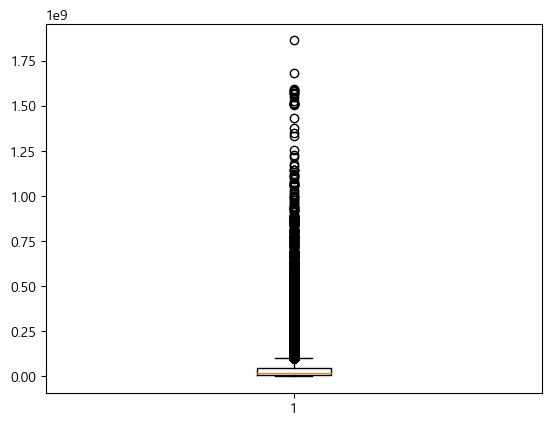

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

plt.boxplot(fin_filter['점포별_평균_매출_금액'])
plt.show()

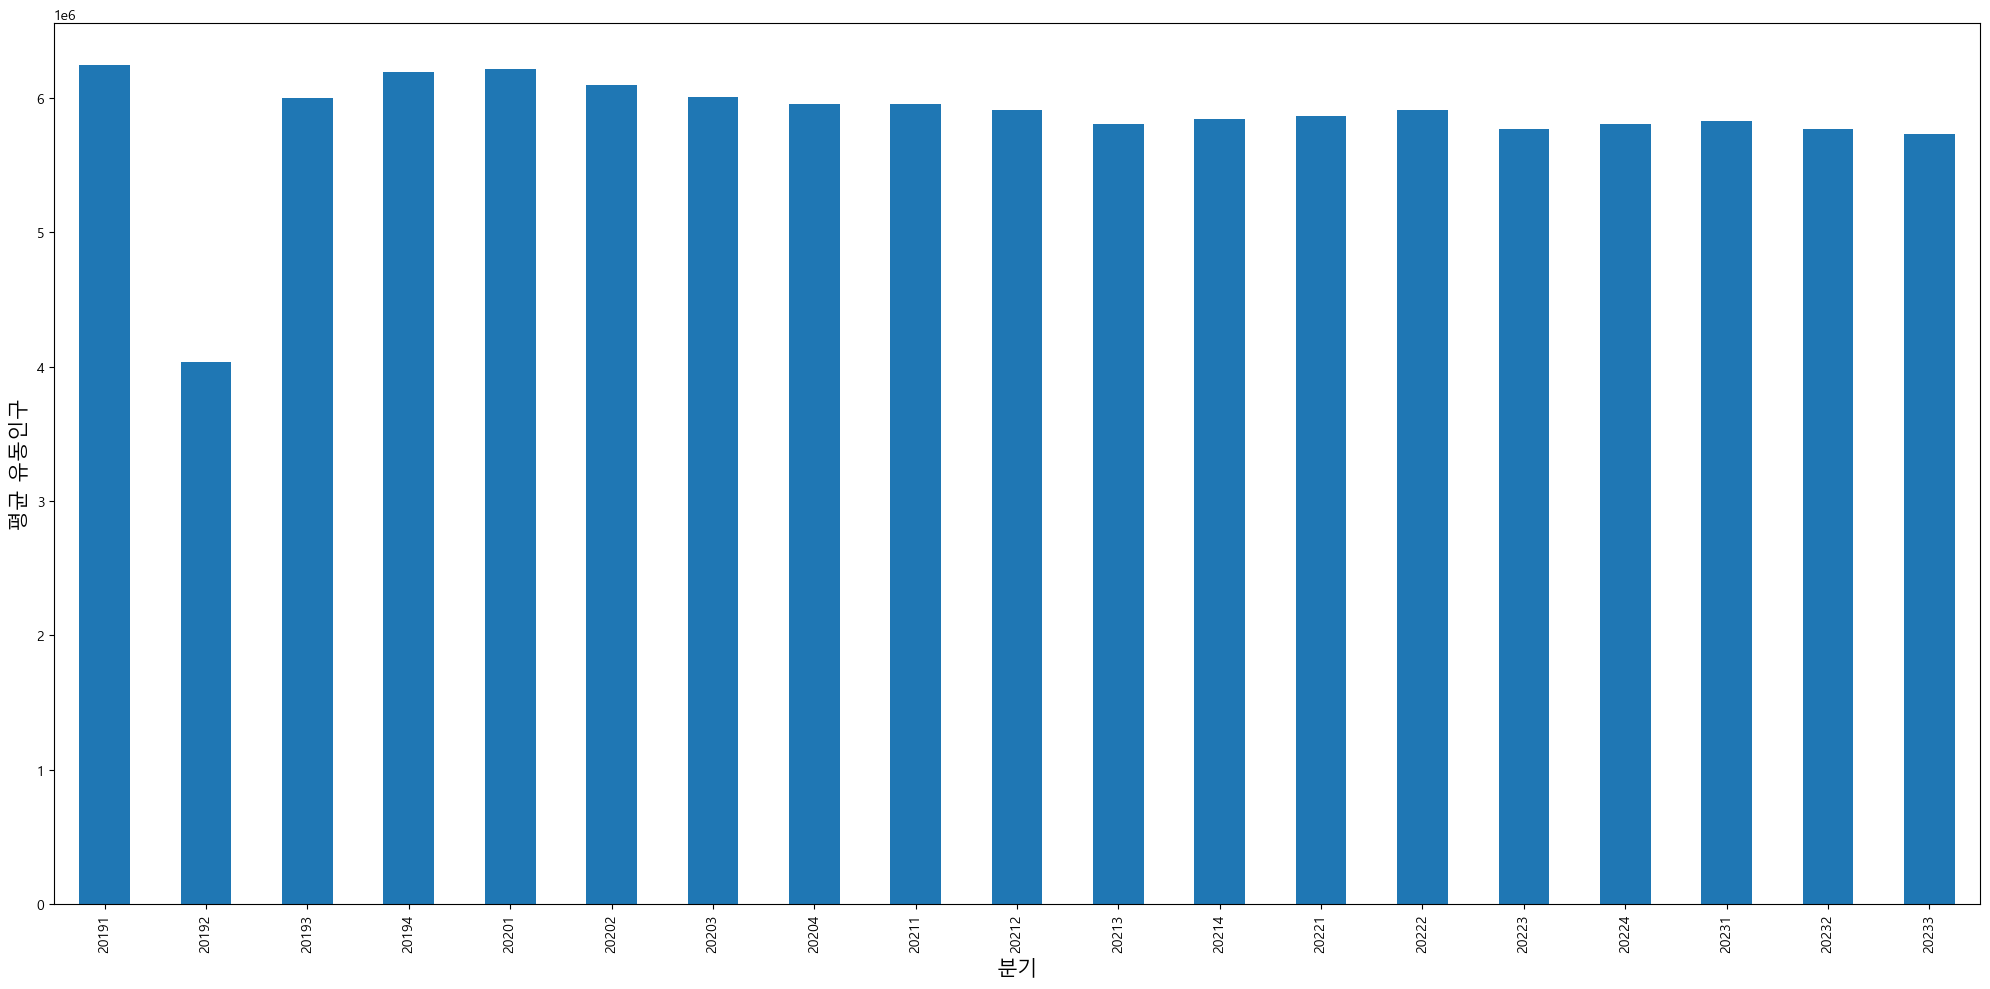

In [84]:
## 분기별 추이 확인(전체)
quarter_people = fin_filter.groupby(["기준_년분기_코드"])["총_유동인구_수"].mean()

# Matplotlib을 사용한 그룹별 바 플롯
plt.figure(figsize=(20,10))
quarter_people.plot(kind='bar', legend=False)

plt.xlabel("분기", fontsize=15)
plt.ylabel('평균 유동인구', fontsize=15)
#plt.title(var+' 총 매출-'+title , fontsize=20)

# 라벨이 겹치지 않도록 조정
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

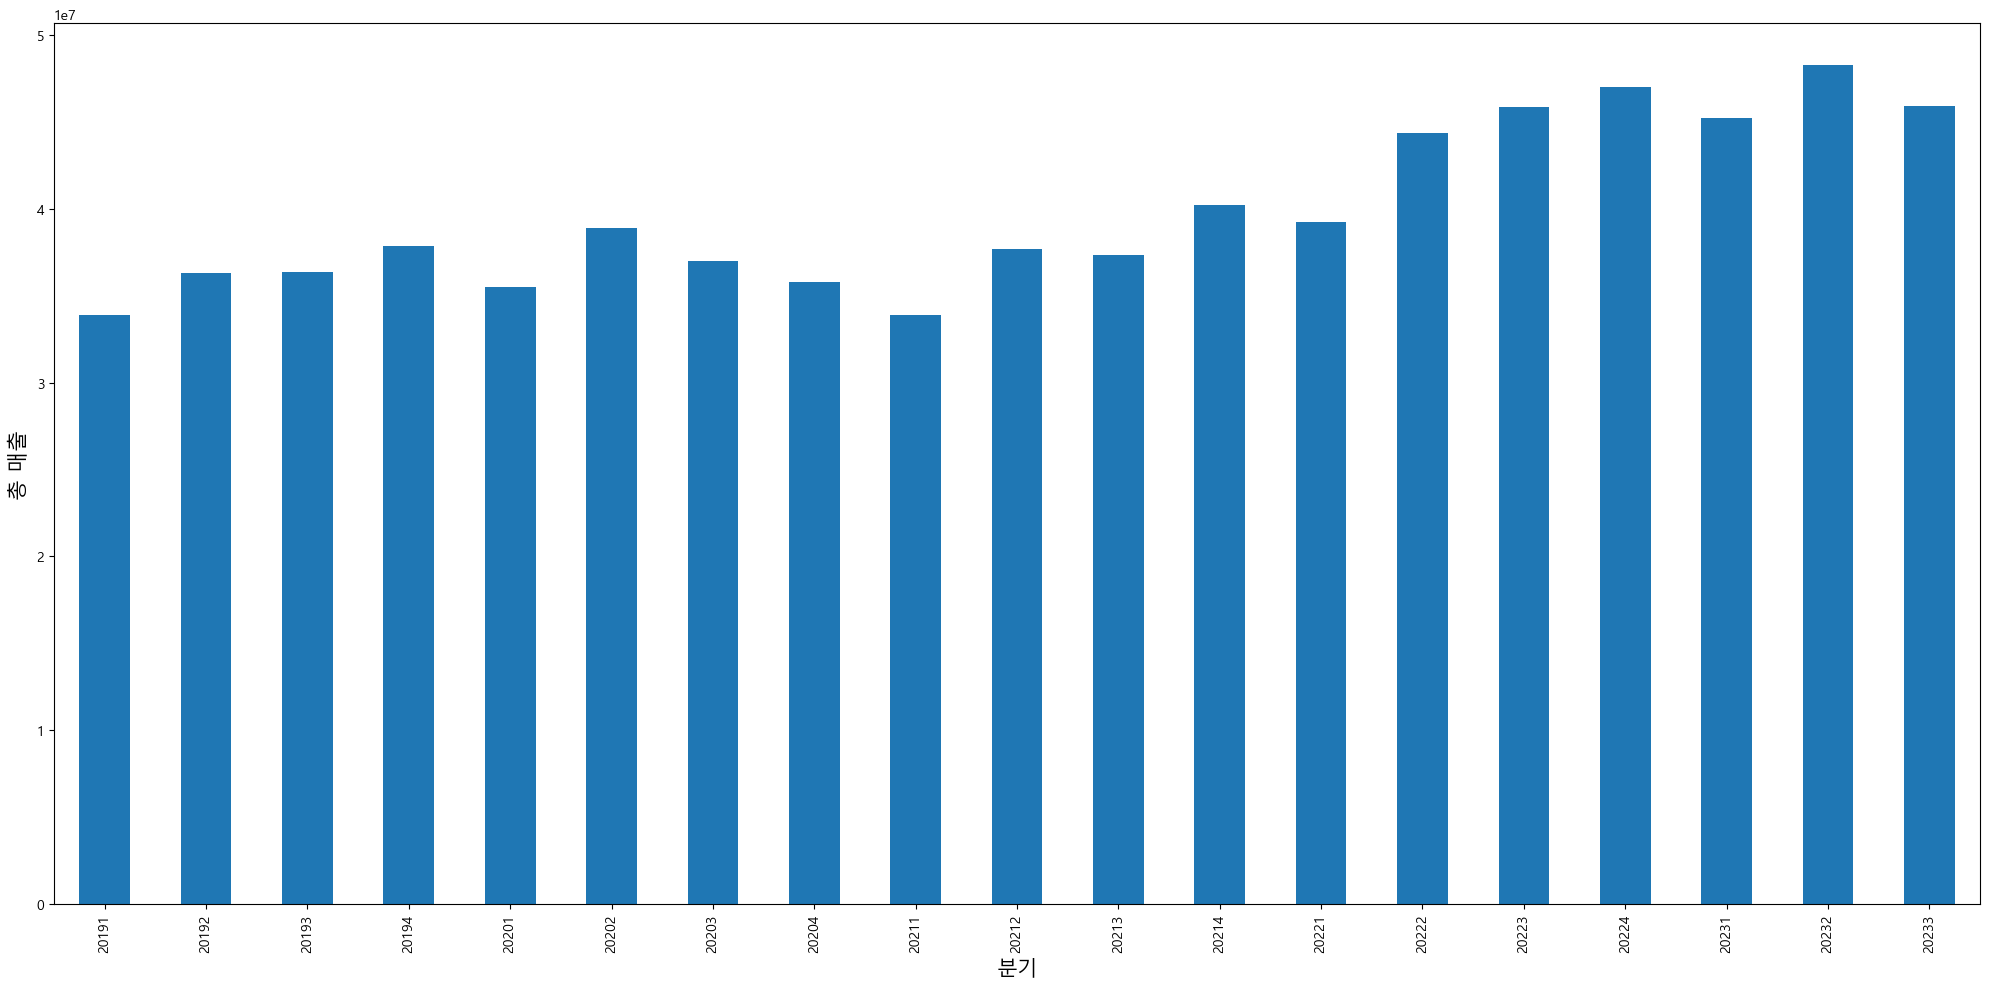

'_summary_\n1. 코로나(20.1-21.4)와 이후는 추세 차이 존재 -> 코로나 변수 생성\n2.  총 매출에서 반복되는 추세가 보임 → 분기(1,2,3,4) 생성\n'

In [85]:
## 분기별 추이 확인(전체)
quarter_sales = fin_filter.groupby(["기준_년분기_코드"])["점포별_평균_매출_금액"].mean()

# Matplotlib을 사용한 그룹별 바 플롯
plt.figure(figsize=(20,10))
quarter_sales.plot(kind='bar', legend=False)

plt.xlabel("분기", fontsize=15)
plt.ylabel('총 매출', fontsize=15)
#plt.title(var+' 총 매출-'+title , fontsize=20)

# 라벨이 겹치지 않도록 조정
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
 
"""_summary_
1. 코로나(20.1-21.4)와 이후는 추세 차이 존재 -> 코로나 변수 생성
2.  총 매출에서 반복되는 추세가 보임 → 분기(1,2,3,4) 생성
"""

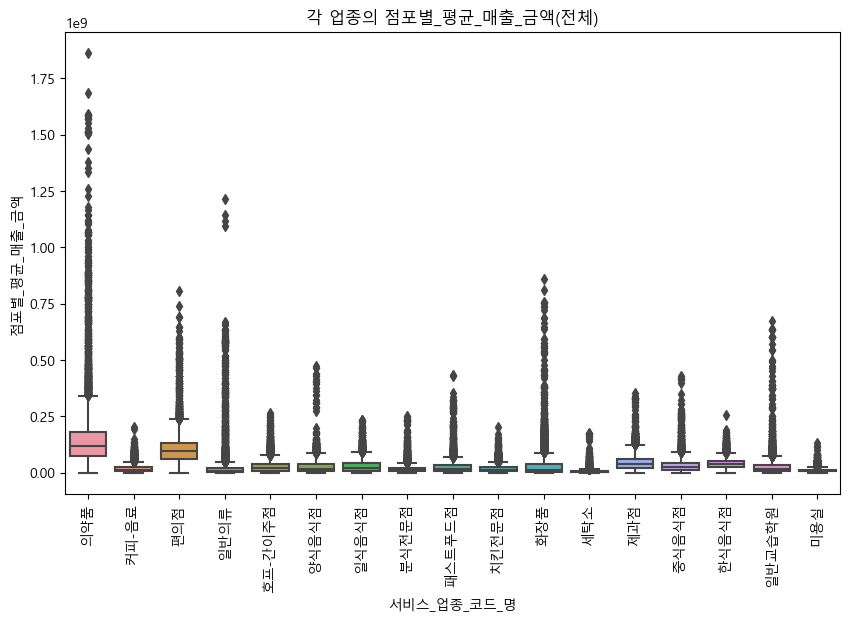

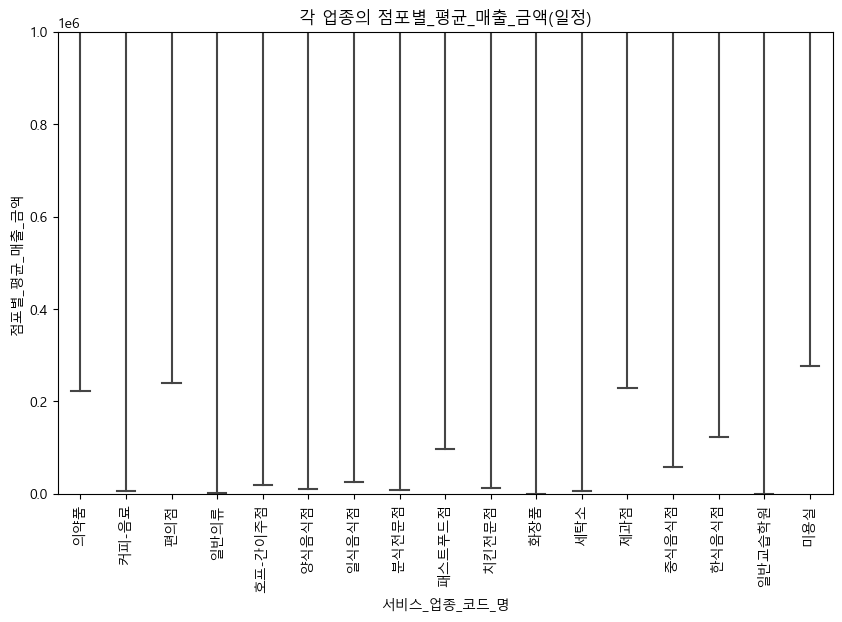

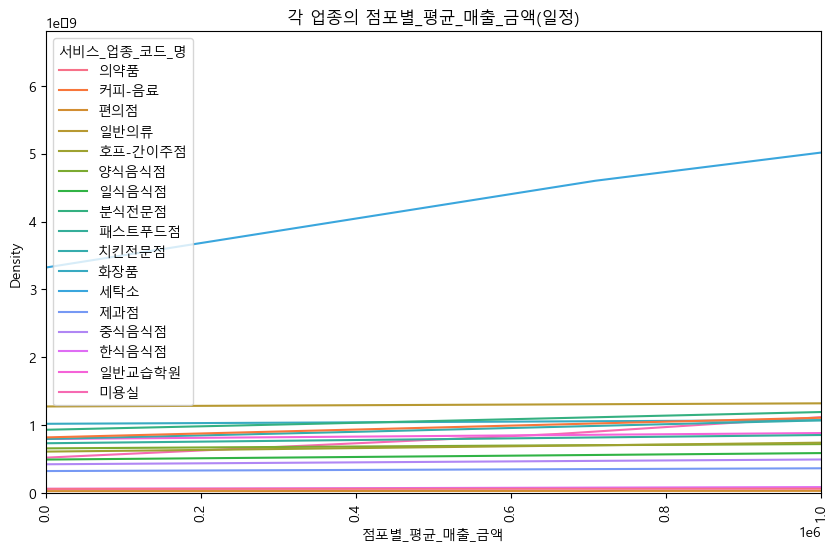

In [86]:
## 각 업종별 평균 매출 추이 파악 - 세탁소 에러 확인(제거), 100만원 이하 건수 삭제 시행
plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(전체)')
sns.boxplot(data=fin_filter, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(일정)')
sns.boxplot(data=fin_filter, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.ylim(0, 1000000)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(일정)')
sns.kdeplot(data=fin_filter, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xlim(0, 1000000)
plt.xticks(rotation=90)
plt.show()

In [87]:
print('제거 전:',fin_filter.shape)
## [이슈4] 점포별_평균_매출_금액에 누락 값(이상치) 존재. 기준점을 세워 데이터 handling 진행
## [이슈5] 세탁소 제거 (현금 장사)
fin_filter_dropped = fin_filter[(fin_filter["점포별_평균_매출_금액"] > 1000000)&(fin_filter["서비스_업종_코드_명"]!="세탁소")]
print('제거 후:',fin_filter_dropped.shape)

제거 전: (121109, 176)
제거 후: (111723, 176)


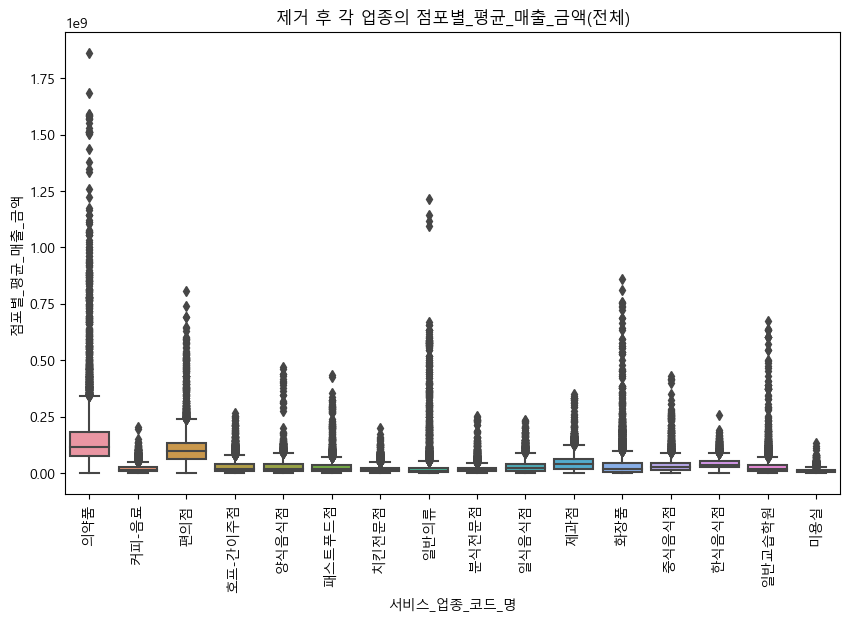

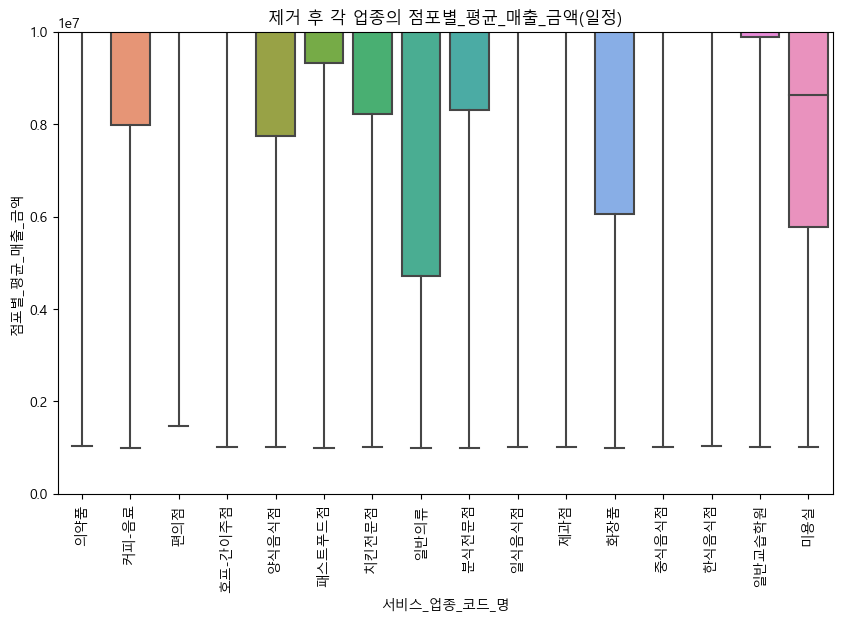

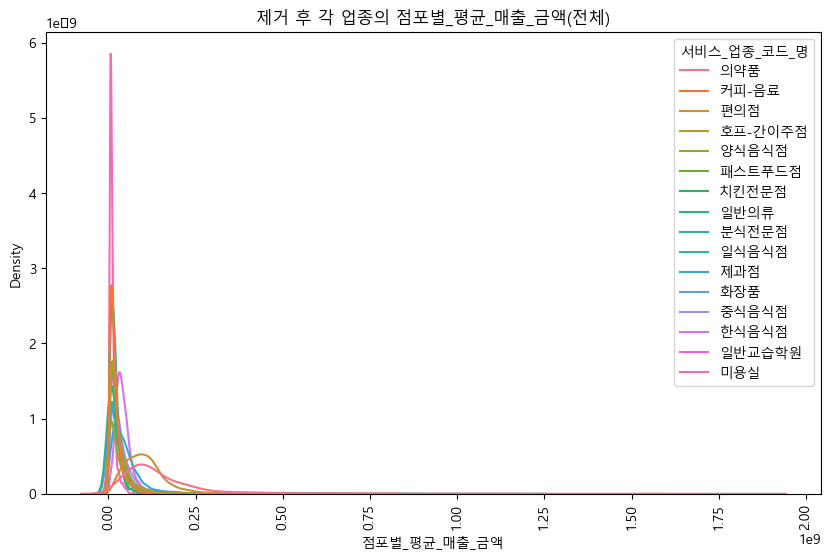

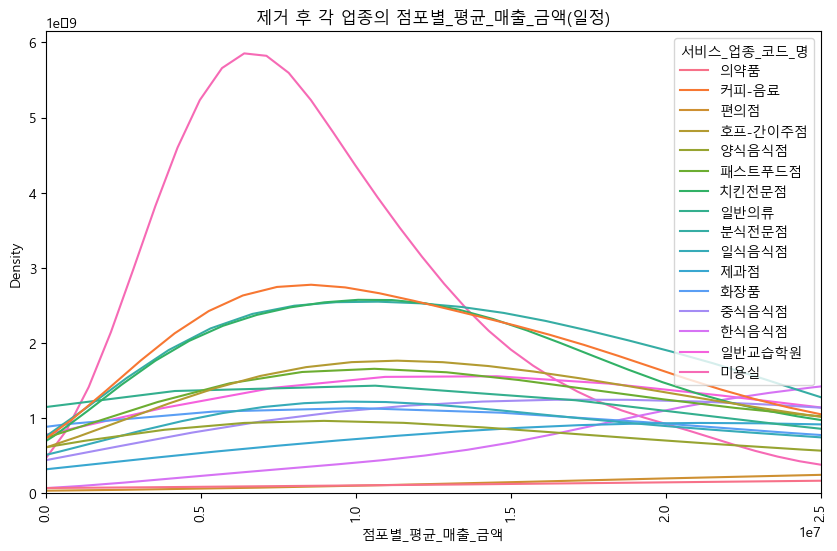

In [88]:
## 이상치 제거 후 각 업종별 평균 매출 추이 파악
plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(전체)')
sns.boxplot(data=fin_filter_dropped, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(일정)')
sns.boxplot(data=fin_filter_dropped, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.ylim(0, 10000000)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(전체)')
sns.kdeplot(data=fin_filter_dropped, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(일정)')
sns.kdeplot(data=fin_filter_dropped, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xlim(0, 25000000)
plt.xticks(rotation=90)
plt.show()

In [89]:
## 분기, 코로나 COL 추가
# 코로나 = 20201-20214
fin_filter_dropped["분기"] = fin_filter_dropped["기준_년분기_코드"].apply(lambda x: int(str(x)[-1]))
fin_filter_dropped["코로나_여부"] = fin_filter_dropped["기준_년분기_코드"].apply(lambda x: 1 if x<20221 else 0)
print(fin_filter_dropped.shape)
fin_filter_dropped[["기준_년분기_코드", "분기", "코로나_여부"]].sort_values("기준_년분기_코드")

(111723, 178)


,기준_년분기_코드,분기,코로나_여부
2,20191,1,1
10802,20191,1,1
10799,20191,1,1
10797,20191,1,1
10796,20191,1,1
...,...,...,...
306601,20233,3,0
306600,20233,3,0
306599,20233,3,0
306617,20233,3,0


### csv 파일로 저장

In [90]:
fin_filter_dropped.to_csv(path2+'dong_service_data.csv', index=False)

## 모델 학습용 데이터

In [91]:
import pandas as pd

pd.set_option('display.max_columns', 500)

### 1. 해당 분기 매출 예측
- y: `점포별_평균_매출_금액`

In [92]:
estimate = pd.read_csv('../../data/preprocessed data/dong_service_data.csv')
estimate.shape

(111723, 178)

In [93]:
drop_cols = ['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

print(len(drop_cols))

48


In [94]:
estimate = estimate.drop(columns=drop_cols)
estimate.shape

(111723, 130)

In [95]:
estimate['점포별_평균_매출_금액'].describe()

count    1.117230e+05
mean     4.281251e+07
std      6.792211e+07
min      1.000067e+06
25%      1.004161e+07
50%      2.240823e+07
75%      4.947487e+07
max      1.863250e+09
Name: 점포별_평균_매출_금액, dtype: float64

In [96]:
estimate.to_csv('../../data/preprocessed data/dong_service_data_estimate.csv', index=False)

### 2. 다음 분기 매출 예측
- y: `점포별_예상_평균_매출_금액`

In [97]:
predict = pd.read_csv('../../data/preprocessed data/dong_service_data.csv')
predict.shape

(111723, 178)

In [98]:
drop_cols = ['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

print(len(drop_cols))

48


In [99]:
predict = predict.drop(columns=drop_cols)
print(predict.shape)

(111723, 130)


y = `점포별_예상_평균_매출_금액`

현재시점이 2023년 2분기일 때, 
- `점포별_예상_평균_매출_금액`(2023년 3분기) → 다음 분기 매출 금액
- `전년도_점포별_평균_매출_금액`(2022년 3분기) → 예측할 분기의 전년도 매출 금액 

In [100]:
predict = predict.sort_values(by=['행정동_코드', '서비스_업종_코드', '기준_년분기_코드'])

predict['점포별_예상_평균_매출_금액'] = predict['점포별_평균_매출_금액'].shift(-1) # '점포별_예상_평균_매출_금액' 컬럼 생성
predict['전년도_점포별_평균_매출_금액'] = predict['점포별_평균_매출_금액'].shift(3) # '전년도_점포별_평균_매출_금액' 컬럼 생성

predict = predict[(20194 < predict['기준_년분기_코드']) & (predict['기준_년분기_코드'] < 20233)]

In [101]:
predict[['기준_년분기_코드', '행정동_코드_명', '서비스_업종_코드_명', '점포별_평균_매출_금액', '전년도_점포별_평균_매출_금액','점포별_예상_평균_매출_금액']].head(30)

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,점포별_평균_매출_금액,전년도_점포별_평균_매출_금액,점포별_예상_평균_매출_금액
28215,20201,청운효자동,한식음식점,2.483180e+07,2.544419e+07,2.502785e+07
32227,20202,청운효자동,한식음식점,2.502785e+07,2.349983e+07,2.319258e+07
36864,20203,청운효자동,한식음식점,2.319258e+07,2.961841e+07,2.432161e+07
43631,20204,청운효자동,한식음식점,2.432161e+07,2.483180e+07,2.504080e+07
49878,20211,청운효자동,한식음식점,2.504080e+07,2.502785e+07,3.282036e+07
57946,20212,청운효자동,한식음식점,3.282036e+07,2.319258e+07,2.675418e+07
60551,20213,청운효자동,한식음식점,2.675418e+07,2.432161e+07,3.800963e+07
69394,20214,청운효자동,한식음식점,3.800963e+07,2.504080e+07,3.242340e+07
73697,20221,청운효자동,한식음식점,3.242340e+07,3.282036e+07,5.035970e+07
78259,20222,청운효자동,한식음식점,5.035970e+07,2.675418e+07,4.206161e+07


In [102]:
predict = predict.sort_index()
predict.to_csv('../../data/preprocessed data/dong_service_data_predict.csv', index=False)

In [103]:
predict.columns.to_list()

['기준_년분기_코드',
 '행정동_코드',
 '행정동_코드_명',
 '서비스_업종_코드',
 '서비스_업종_코드_명',
 '집객시설_수',
 '관공서_수',
 '은행_수',
 '종합병원_수',
 '일반_병원_수',
 '약국_수',
 '유치원_수',
 '초등학교_수',
 '중학교_수',
 '고등학교_수',
 '대학교_수',
 '백화점_수',
 '슈퍼마켓_수',
 '극장_수',
 '숙박_시설_수',
 '공항_수',
 '철도_역_수',
 '버스_터미널_수',
 '지하철_역_수',
 '버스_정거장_수',
 '총_직장_인구_수',
 '남성_직장_인구_수',
 '여성_직장_인구_수',
 '연령대_10_직장_인구_수',
 '연령대_20_직장_인구_수',
 '연령대_30_직장_인구_수',
 '연령대_40_직장_인구_수',
 '연령대_50_직장_인구_수',
 '연령대_60_이상_직장_인구_수',
 '남성연령대_10_직장_인구_수',
 '남성연령대_20_직장_인구_수',
 '남성연령대_30_직장_인구_수',
 '남성연령대_40_직장_인구_수',
 '남성연령대_50_직장_인구_수',
 '남성연령대_60_이상_직장_인구_수',
 '여성연령대_10_직장_인구_수',
 '여성연령대_20_직장_인구_수',
 '여성연령대_30_직장_인구_수',
 '여성연령대_40_직장_인구_수',
 '여성연령대_50_직장_인구_수',
 '여성연령대_60_이상_직장_인구_수',
 '점포_수',
 '유사_업종_점포_수',
 '개업_율',
 '개업_점포_수',
 '폐업_률',
 '폐업_점포_수',
 '프랜차이즈_점포_수',
 '아파트_단지_수',
 '아파트_면적_66_제곱미터_미만_세대_수',
 '아파트_면적_66_제곱미터_세대_수',
 '아파트_면적_99_제곱미터_세대_수',
 '아파트_면적_132_제곱미터_세대_수',
 '아파트_면적_165_제곱미터_세대_수',
 '아파트_가격_1_억_미만_세대_수',
 '아파트_가격_1_억_세대_수',
 '아파트_가격_2_억_세대_수',
 '아파트_가격_3_억_세대_수

In [104]:
predict[(predict['행정동_코드_명'] == '둔촌2동') & (predict['서비스_업종_코드_명'] == '화장품')]

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_00_06_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,점포별_평균_매출_금액,분기,코로나_여부,점포별_예상_평균_매출_금액,전년도_점포별_평균_매출_금액
24879,20201,11740700,둔촌2동,CS300022,화장품,129.0,5.0,4.0,1.0,0.0,17.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,4961,2239,2722,4,946,1293,1058,1026,634,2,281,537,526,489,404,2,665,756,532,537,230,21,21,5,1,0,0,0,315,3013.0,3387.0,734.0,72.0,21.0,352.0,1196.0,940.0,1477.0,2131.0,902.0,229.0,58,221824698,3414406,7,3085277000,718841000,67222000,65955000,426691000,269773000,110717000,68497000,244395000,195013000,918173000,27648,13656,13992,4390,4034,4074,4098,4694,6358,2331,2053,2051,2006,2235,2980,2059,1981,2023,2092,2459,3378,11207,0,11207,8380409,3952569,4427840,1335295,1030726,1203198,1279709,1284437,2247043,2413784,1796196,939968,885132,1240164,1105166,1210677,1207439,1206174,1198812,1193427,1167601,1196278,2.212738e+06,1,1,2.237292e+06,9.915935e+07
31823,20202,11740700,둔촌2동,CS300022,화장품,129.0,5.0,4.0,1.0,0.0,17.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,4961,2239,2722,4,946,1293,1058,1026,634,2,281,537,526,489,404,2,665,756,532,537,230,22,22,5,1,0,0,0,315,3013.0,3387.0,734.0,72.0,21.0,352.0,1196.0,940.0,1477.0,2131.0,902.0,229.0,58,221824698,3414406,7,3587473000,801015000,83738000,33420000,496714000,389007000,100746000,70200000,294387000,216320000,1101926000,27648,13656,13992,4390,4034,4074,4098,4694,6358,2331,2053,2051,2006,2235,2980,2059,1981,2023,2092,2459,3378,11207,0,11207,7665678,3599425,4066255,1277072,931390,1075731,1182969,1177540,2020977,2196573,1630535,858774,819626,1145253,1014917,1112331,1100605,1102107,1095843,1095512,1068686,1090595,2.237292e+06,2,1,1.237453e+06,1.137505e+06
85594,20223,11740700,둔촌2동,CS300022,화장품,129.0,5.0,4.0,1.0,0.0,17.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,4961,2239,2722,4,946,1293,1058,1026,634,2,281,537,526,489,404,2,665,756,532,537,230,19,19,5,1,0,0,0,319,2006.0,814.0,127.0,28.0,15.0,223.0,1073.0,821.0,226.0,135.0,153.0,359.0,56,260893962,3414406,7,4695661000,845851000,39357000,134112000,539514000,1076350000,148722000,50079000,367439000,302385000,1191852000,26347,12961,13386,4011,3746,3861,3901,4390,6438,2095,1883,1967,1950,2073,2993,1916,1863,1894,1951,2317,3445,11040,0,11040,7207926,3453547,3754381,1434797,824163,1002688,1103788,1079809,1762683,1974000,1533641,832698,804353,1125352,937882,1041698,1037398,1036839,1027223,1023786,1003354,1037629,1.237453e+06,3,0,1.599651e+06,1.626892e+06
93138,20224,11740700,둔촌2동,CS300022